# The Beta Function

## Introduction

The **Beta function** $B(a, b)$ is a fundamental special function in mathematics with deep connections to probability theory, combinatorics, and the Gamma function. It appears naturally in Bayesian statistics, the theory of distributions, and various integral evaluations.

## Definition

The Beta function is defined for $\text{Re}(a) > 0$ and $\text{Re}(b) > 0$ by the integral:

$$B(a, b) = \int_0^1 t^{a-1}(1-t)^{b-1}\,dt$$

## Relation to the Gamma Function

The Beta function has an elegant closed-form expression in terms of the Gamma function:

$$B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$

This relationship is fundamental and allows efficient computation of the Beta function.

## Key Properties

### Symmetry
$$B(a, b) = B(b, a)$$

### Recurrence Relations
$$B(a, b) = \frac{a+b}{b}B(a, b+1) = \frac{a+b}{a}B(a+1, b)$$

### Special Values
For positive integers $m$ and $n$:
$$B(m, n) = \frac{(m-1)!(n-1)!}{(m+n-1)!}$$

### Relationship to Binomial Coefficients
$$\binom{n}{k} = \frac{1}{(n+1)B(n-k+1, k+1)}$$

## Applications

1. **Beta Distribution**: The probability density function of the Beta distribution is:
   $$f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

2. **Incomplete Beta Function**: Used in statistical distributions (Student's t, F-distribution)

3. **Trigonometric Integrals**: 
   $$\int_0^{\pi/2} \sin^{2a-1}\theta\cos^{2b-1}\theta\,d\theta = \frac{1}{2}B(a, b)$$

In [1]:
import numpy as np
from scipy import special
from scipy import integrate
import matplotlib.pyplot as plt

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Numerical Computation of the Beta Function

We'll compute the Beta function using three methods:
1. Direct numerical integration of the defining integral
2. Using the Gamma function relationship
3. Using SciPy's built-in `special.beta`

In [2]:
def beta_integral(a, b):
    """Compute Beta function via direct numerical integration."""
    integrand = lambda t: t**(a-1) * (1-t)**(b-1)
    result, _ = integrate.quad(integrand, 0, 1)
    return result

def beta_gamma(a, b):
    """Compute Beta function using Gamma function relationship."""
    return special.gamma(a) * special.gamma(b) / special.gamma(a + b)

# Test the three methods
test_cases = [(2, 3), (0.5, 0.5), (1, 1), (3.5, 2.5), (0.1, 5)]

print("Comparison of Beta Function Computation Methods")
print("=" * 65)
print(f"{'(a, b)':<12} {'Integral':<15} {'Gamma':<15} {'SciPy':<15}")
print("-" * 65)

for a, b in test_cases:
    b_int = beta_integral(a, b)
    b_gam = beta_gamma(a, b)
    b_scipy = special.beta(a, b)
    print(f"({a}, {b}){'':<5} {b_int:<15.8f} {b_gam:<15.8f} {b_scipy:<15.8f}")

Comparison of Beta Function Computation Methods
(a, b)       Integral        Gamma           SciPy          
-----------------------------------------------------------------
(2, 3)      0.08333333      0.08333333      0.08333333     
(0.5, 0.5)      3.14159265      3.14159265      3.14159265     
(1, 1)      1.00000000      1.00000000      1.00000000     
(3.5, 2.5)      0.03681554      0.03681554      0.03681554     
(0.1, 5)      8.17435908      8.17435908      8.17435908     


## Visualization of the Beta Function

Let's visualize the Beta function as a surface and examine its behavior for various parameter values.

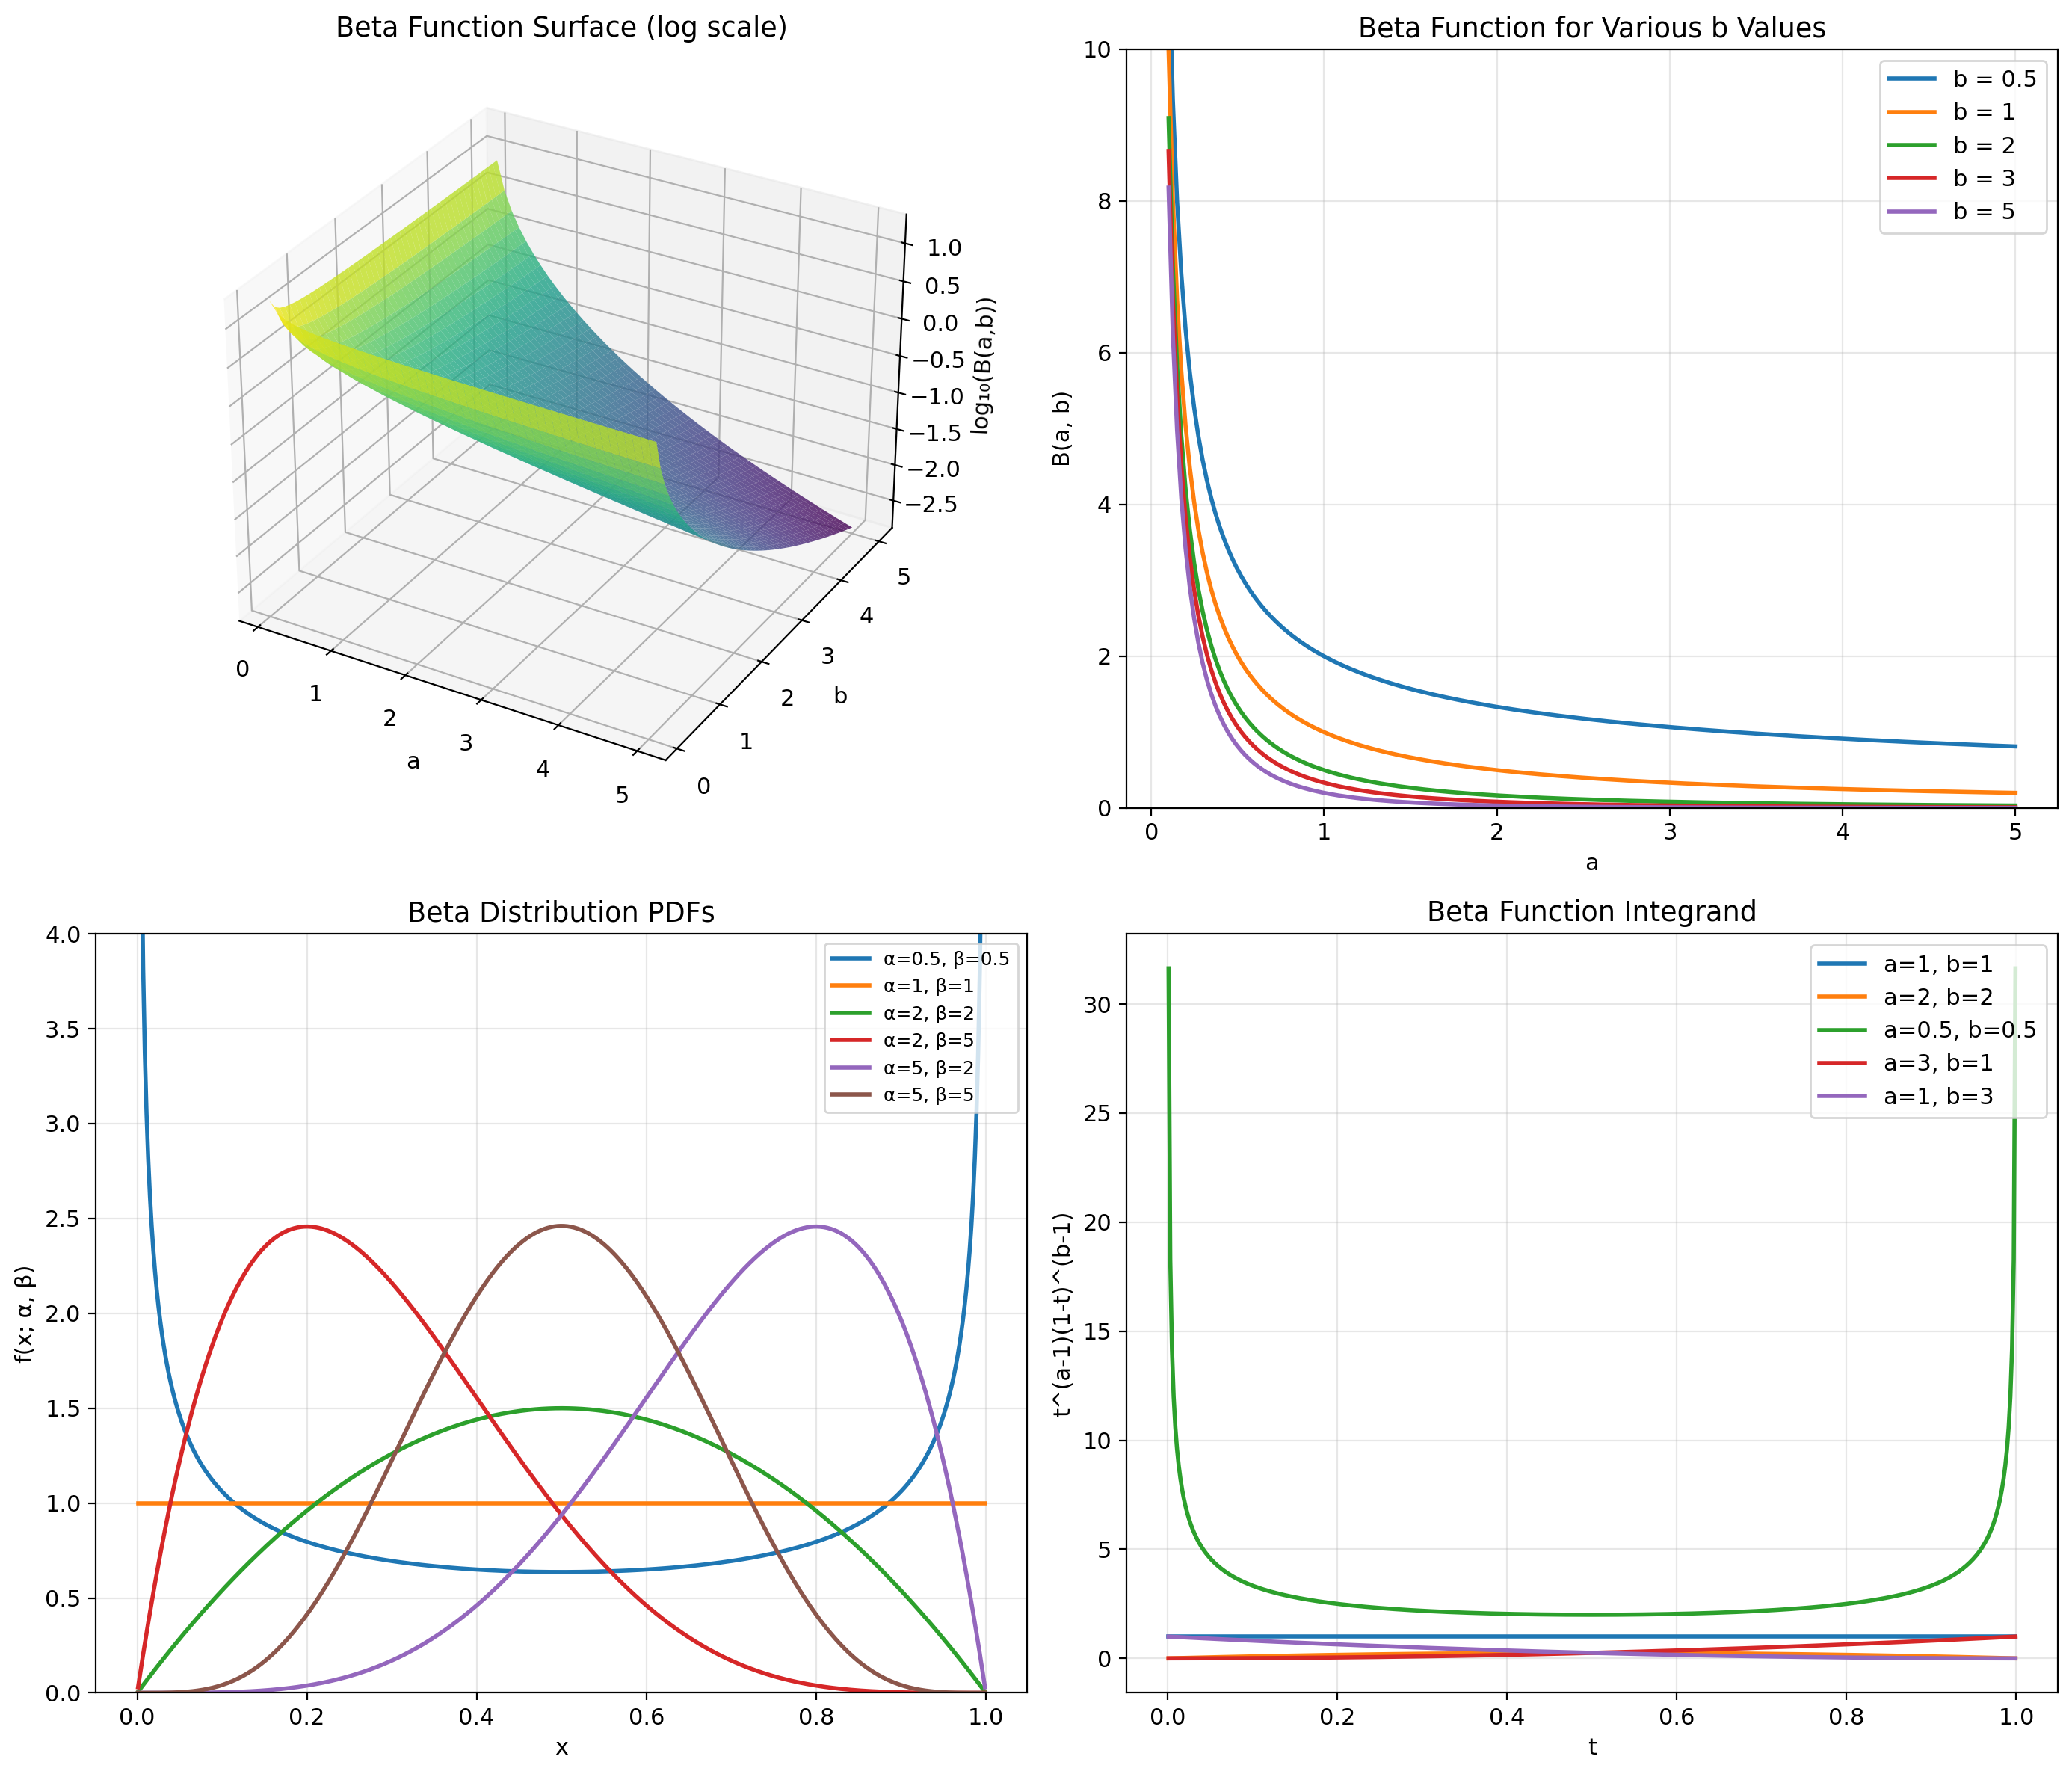


Plot saved to 'plot.png'


In [3]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(14, 12))

# Plot 1: Beta function surface (log scale for better visualization)
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
a_vals = np.linspace(0.1, 5, 50)
b_vals = np.linspace(0.1, 5, 50)
A, B = np.meshgrid(a_vals, b_vals)
Z = special.beta(A, B)

surf = ax1.plot_surface(A, B, np.log10(Z), cmap='viridis', alpha=0.8)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_zlabel('log₁₀(B(a,b))')
ax1.set_title('Beta Function Surface (log scale)')

# Plot 2: Beta function for fixed b values
ax2 = fig.add_subplot(2, 2, 2)
a_range = np.linspace(0.1, 5, 200)
b_fixed = [0.5, 1, 2, 3, 5]

for b in b_fixed:
    beta_vals = special.beta(a_range, b)
    ax2.plot(a_range, beta_vals, label=f'b = {b}', linewidth=2)

ax2.set_xlabel('a')
ax2.set_ylabel('B(a, b)')
ax2.set_title('Beta Function for Various b Values')
ax2.set_ylim(0, 10)
ax2.legend()

# Plot 3: Beta distribution PDFs
ax3 = fig.add_subplot(2, 2, 3)
x = np.linspace(0.001, 0.999, 500)
params = [(0.5, 0.5), (1, 1), (2, 2), (2, 5), (5, 2), (5, 5)]

for alpha, beta_param in params:
    pdf = x**(alpha-1) * (1-x)**(beta_param-1) / special.beta(alpha, beta_param)
    ax3.plot(x, pdf, label=f'α={alpha}, β={beta_param}', linewidth=2)

ax3.set_xlabel('x')
ax3.set_ylabel('f(x; α, β)')
ax3.set_title('Beta Distribution PDFs')
ax3.set_ylim(0, 4)
ax3.legend(loc='upper right', fontsize=9)

# Plot 4: Integrand visualization
ax4 = fig.add_subplot(2, 2, 4)
t = np.linspace(0.001, 0.999, 500)
integrand_params = [(1, 1), (2, 2), (0.5, 0.5), (3, 1), (1, 3)]

for a, b in integrand_params:
    integrand = t**(a-1) * (1-t)**(b-1)
    ax4.plot(t, integrand, label=f'a={a}, b={b}', linewidth=2)

ax4.set_xlabel('t')
ax4.set_ylabel('t^(a-1)(1-t)^(b-1)')
ax4.set_title('Beta Function Integrand')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.savefig('beta_function_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Verification of Key Properties

Let's numerically verify the important properties of the Beta function.

In [4]:
print("Verification of Beta Function Properties")
print("=" * 50)

# 1. Symmetry: B(a, b) = B(b, a)
print("\n1. Symmetry Property: B(a, b) = B(b, a)")
test_pairs = [(2, 5), (0.5, 3), (1.5, 2.5)]
for a, b in test_pairs:
    b_ab = special.beta(a, b)
    b_ba = special.beta(b, a)
    print(f"   B({a}, {b}) = {b_ab:.8f}, B({b}, {a}) = {b_ba:.8f}, Equal: {np.isclose(b_ab, b_ba)}")

# 2. Special value B(1, 1) = 1
print(f"\n2. Special Value: B(1, 1) = {special.beta(1, 1):.8f} (expected: 1)")

# 3. B(1/2, 1/2) = π
b_half = special.beta(0.5, 0.5)
print(f"\n3. Special Value: B(1/2, 1/2) = {b_half:.8f} (expected π = {np.pi:.8f})")

# 4. Integer formula: B(m, n) = (m-1)!(n-1)!/(m+n-1)!
print("\n4. Integer Formula Verification:")
from math import factorial
for m, n in [(3, 4), (2, 5), (4, 4)]:
    b_scipy = special.beta(m, n)
    b_formula = factorial(m-1) * factorial(n-1) / factorial(m+n-1)
    print(f"   B({m}, {n}): scipy = {b_scipy:.8f}, formula = {b_formula:.8f}")

# 5. Trigonometric integral relationship
print("\n5. Trigonometric Integral: ∫₀^(π/2) sin^(2a-1)θ cos^(2b-1)θ dθ = B(a,b)/2")
a, b = 2, 3
trig_integrand = lambda theta: np.sin(theta)**(2*a-1) * np.cos(theta)**(2*b-1)
trig_integral, _ = integrate.quad(trig_integrand, 0, np.pi/2)
expected = special.beta(a, b) / 2
print(f"   For a={a}, b={b}: Integral = {trig_integral:.8f}, B(a,b)/2 = {expected:.8f}")

Verification of Beta Function Properties

1. Symmetry Property: B(a, b) = B(b, a)
   B(2, 5) = 0.03333333, B(5, 2) = 0.03333333, Equal: True
   B(0.5, 3) = 1.06666667, B(3, 0.5) = 1.06666667, Equal: True
   B(1.5, 2.5) = 0.19634954, B(2.5, 1.5) = 0.19634954, Equal: True

2. Special Value: B(1, 1) = 1.00000000 (expected: 1)

3. Special Value: B(1/2, 1/2) = 3.14159265 (expected π = 3.14159265)

4. Integer Formula Verification:
   B(3, 4): scipy = 0.01666667, formula = 0.01666667
   B(2, 5): scipy = 0.03333333, formula = 0.03333333
   B(4, 4): scipy = 0.00714286, formula = 0.00714286

5. Trigonometric Integral: ∫₀^(π/2) sin^(2a-1)θ cos^(2b-1)θ dθ = B(a,b)/2
   For a=2, b=3: Integral = 0.04166667, B(a,b)/2 = 0.04166667


## The Incomplete Beta Function

The incomplete Beta function and its regularized form are crucial in statistics:

$$B(x; a, b) = \int_0^x t^{a-1}(1-t)^{b-1}\,dt$$

The regularized incomplete Beta function is:
$$I_x(a, b) = \frac{B(x; a, b)}{B(a, b)}$$

This function is the CDF of the Beta distribution.

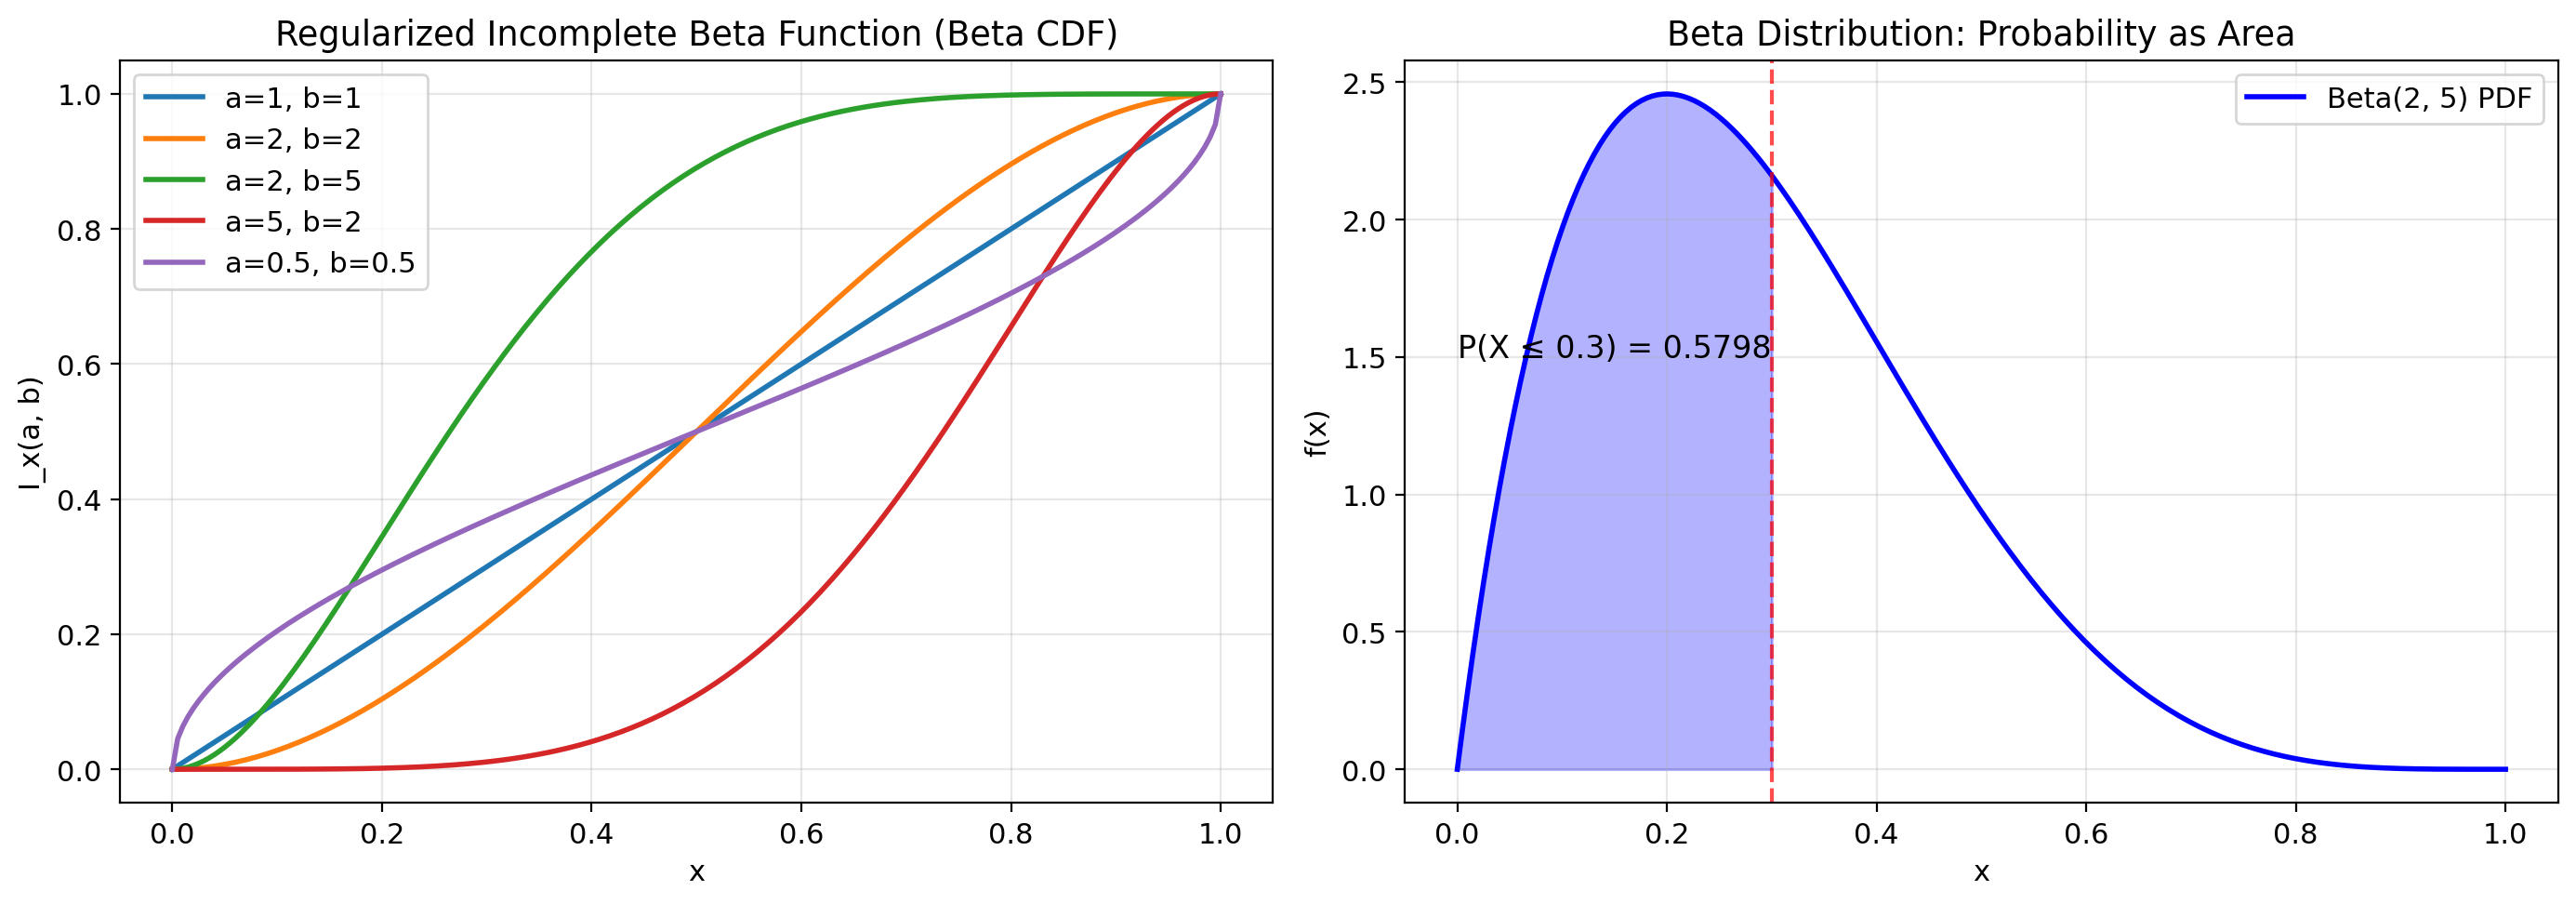

In [5]:
# Visualize the regularized incomplete Beta function
x_vals = np.linspace(0, 1, 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Different parameter combinations
params = [(1, 1), (2, 2), (2, 5), (5, 2), (0.5, 0.5)]

for a, b in params:
    I_x = special.betainc(a, b, x_vals)
    ax1.plot(x_vals, I_x, label=f'a={a}, b={b}', linewidth=2)

ax1.set_xlabel('x')
ax1.set_ylabel('I_x(a, b)')
ax1.set_title('Regularized Incomplete Beta Function (Beta CDF)')
ax1.legend()

# Show relationship to probability
a, b = 2, 5
x_fill = np.linspace(0, 0.3, 100)
pdf = x_fill**(a-1) * (1-x_fill)**(b-1) / special.beta(a, b)

x_full = np.linspace(0, 1, 200)
pdf_full = x_full**(a-1) * (1-x_full)**(b-1) / special.beta(a, b)

ax2.plot(x_full, pdf_full, 'b-', linewidth=2, label=f'Beta({a}, {b}) PDF')
ax2.fill_between(x_fill, pdf, alpha=0.3, color='blue')
ax2.axvline(x=0.3, color='red', linestyle='--', alpha=0.7)

prob = special.betainc(a, b, 0.3)
ax2.text(0.15, 1.5, f'P(X ≤ 0.3) = {prob:.4f}', fontsize=12, ha='center')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Beta Distribution: Probability as Area')
ax2.legend()

plt.tight_layout()
plt.show()

## Conclusion

The Beta function is a cornerstone of mathematical analysis with elegant properties:

1. **Symmetry** in its arguments
2. **Direct relationship** to the Gamma function
3. **Foundation** for the Beta distribution in probability
4. **Applications** in combinatorics through binomial coefficients

Its regularized incomplete form serves as the cumulative distribution function for the Beta distribution, making it essential in Bayesian inference and statistical testing.